In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Outils.dataloader import load_CIFAR10
from PIL import Image

In [2]:
a = 0
b = 255
x = np.arange(255)
d = np.minimum(b - x, x - a)


In [3]:
res_x = np.zeros(len(x))
for i in range(len(x)):
    x1 = b - d[i]
    x2 = a + d[i]
    if 2*x1 >= a + b:
        res_x[i] = x1 
    if 2*x2 < a + b:
        res_x[i] = x2 


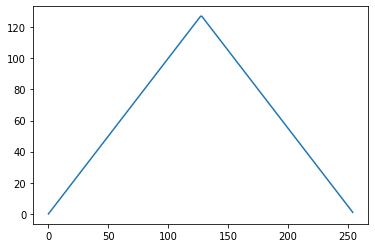

In [4]:
plt.plot(d)

In [19]:
res_x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 127., 126., 125., 124.,
       123., 122., 121., 120., 119., 118., 117., 116., 115., 114., 113.,
       112., 111., 110., 109., 108., 107., 106., 10

In [5]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'Dataset/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [6]:
from set_redundancy_compression import MMD_Encoder

X = X_test
max_im, min_im, Y = MMD_Encoder(X)
Y.shape

(10000, 32, 32, 3)

In [7]:
# Test saved image memory
import cv2
# min_saved = Image.fromarray(min_im)
# max_saved = Image.fromarray(max_im)
# min_saved.save('min.jpeg')
# max_saved.save('max.jpeg')
cv2.imwrite('min.jpeg', min_im)
cv2.imwrite('max.jpeg', max_im)

True

In [9]:
random_im = X[1000]

In [10]:
cv2.imwrite('random.jpeg', random_im)

True

In [10]:
np.save('min.npy', min_im)
np.save('max.npy', max_im)
np.save('random_npy.npy', random_im)

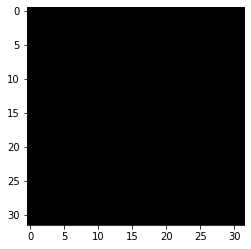

In [9]:
plt.imshow(min_im.astype('uint8'))

In [8]:
# from set_redundancy_compression import MMD_Decoder

# X_decoded = MMD_Decoder(Y, max_im, min_im)

In [14]:
def MMD_Decoder(Y, max_im, min_im):
    '''
    Function to decode the min-max differential 
    Input: Y - set of images encoded of shape N x H x W x C 
    Output: X - set of original images of shape N x H x W x C 
    '''

    X = (Y + min_im)*(2*Y < max_im - min_im) + (max_im - Y)*(2*Y > max_im - min_im)
    return X

In [15]:
X_decoded = MMD_Decoder(Y, max_im, min_im)

In [17]:
X

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [16]:
X_decoded == X

array([[[[False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         ...,
         [False,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         ...,
         [False,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         ...,
         [False,  True,  True],
         [False,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True, False],
         [ True,  True, False],
         [ True,  True, False],
         ...,
         [ True,  True, False],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True, False],
         [ True,  True, False],
         [ True,  True, False],
         ...,
         [ True,  True, False],
         [ T